In [35]:
import pandas as pd
import matplotlib.pyplot as axes
import numpy as np
from matplotlib.pyplot import figure, xticks

import json
import glob
import argparse
import numpy as np
from tabulate import tabulate

# import pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt


# plt.style.use('ggplot')

pd.set_option('display.max_colwidth', None)

In [36]:
df_perturb = pd.read_csv(r"./result-analysis/perturb.csv").iloc[1: , :]
df_twostep = pd.read_csv(r"./result-analysis/two-step.csv").iloc[1: , :]
df_joint = pd.read_csv(r"./result-analysis/joint.csv").iloc[1: , :]

In [37]:
df_perturb.columns = [
    'filename', 'model_target', 'downstream_task', 'perturbation_technique',
    'codemix_lang', 'perturb_ratio', 'before_attack_acc_mean',
    'before_attack_acc_std', 'after_attack_acc_mean', 'after_attack_acc_std',
    'delta_acc_mean', 'delta_acc_std', 'avg_semantic_sim_mean', 'avg_semantic_sim_std',
    'adv_training_mean', 'adv_training_std', 'acc_improvement_on_adv_train_mean',
    'acc_improvement_on_adv_train_std', 'acc_adv_training_on_orig_mean',
    'acc_adv_training_on_orig_std', 'orig_acc_vs_adv_mean', 'orig_acc_vs_adv_std',
    'avg_running_time(s)'
]

In [34]:
df_perturb["before_attack_acc"]

KeyError: 'before_attack_acc'

<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


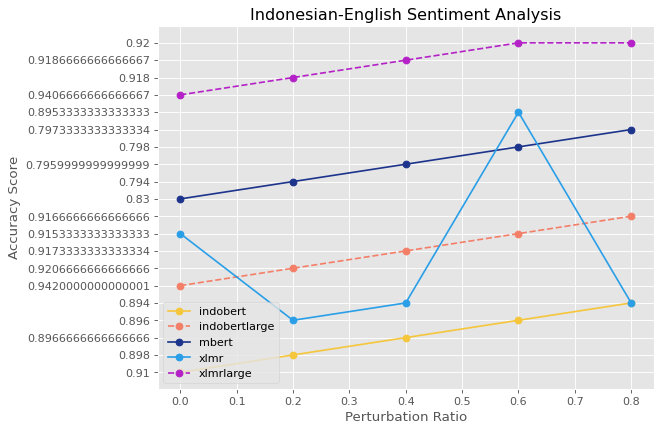

<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


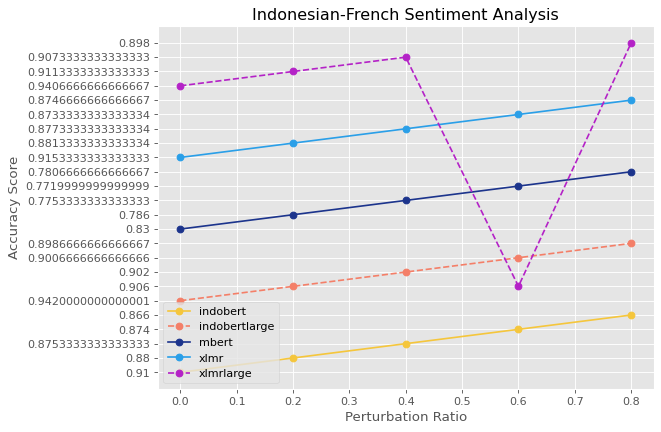

<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


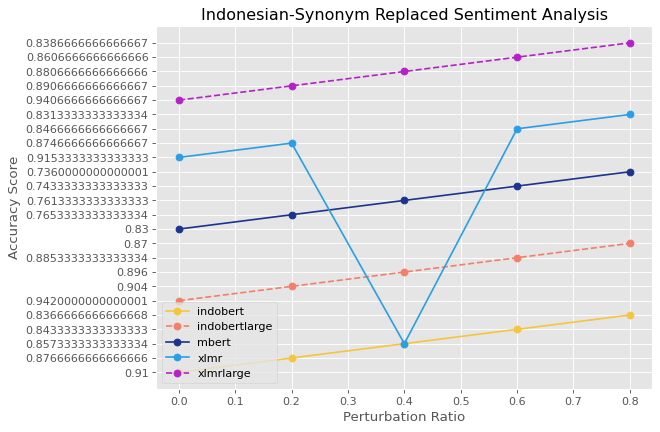

<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


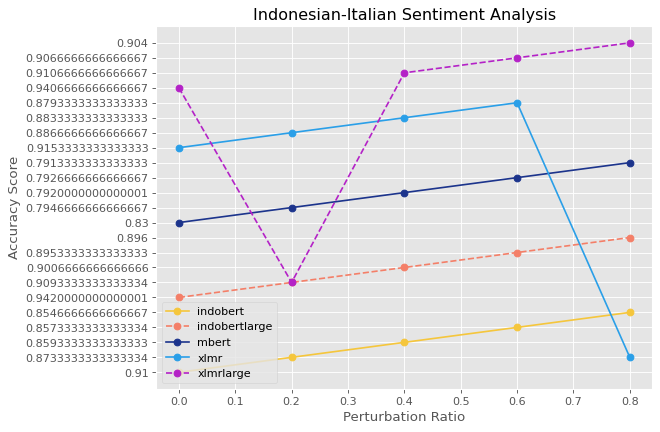

<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


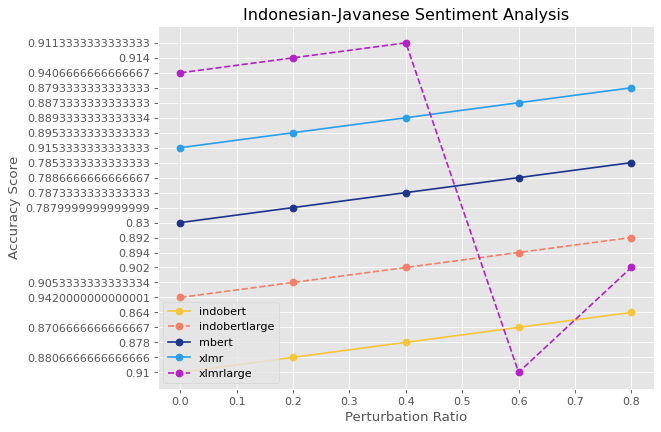

<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


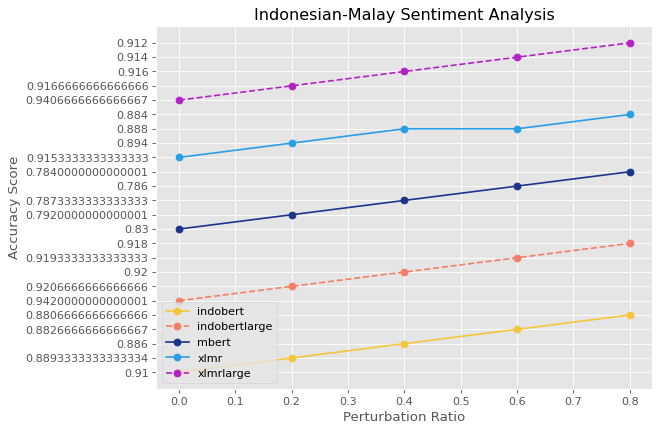

<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-28-9fabb2076939>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


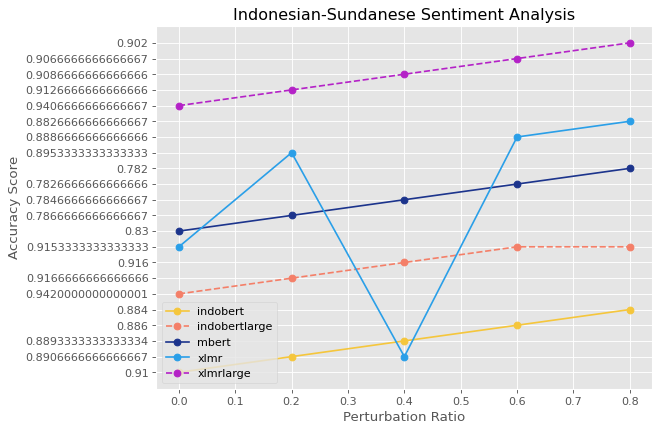

In [28]:
# plt.style.use('ggplot')

def visualize_1(lang, task, df=df_joint):   
    lang_map = {
        "en": "English",
        'fr': "French", 
        'id': "Synonym Replaced", 
        'it': "Italian", 
        'jw': "Javanese", 
        'ms': "Malay", 
        'su': "Sundanese"
    }

    color_map = {
        'indobert': "#f5c63c", 
        'indobertlarge': "#f47f68", 
        'xlmrlarge': "#b422c7",
        'mbert': "#1c348c", 
        'xlmr': "#2a9fe8"
    }

    task_map = {
        "emotion": "Emotion Classification",
        "sentiment": "Sentiment Analysis"
    }


    df_lang = df[(df["codemix_lang"] == lang) & (df["downstream_task"] == task)]

    percent_pert = [0, 0.2, 0.4, 0.6, 0.8]
    list_model = df_lang.model_target.unique()
    
    figure(num=None, figsize=(8, 6), dpi=80)


    for model in list_model:
        acc_arr = df_lang[(df_lang["model_target"] == model)].after_attack_acc.values
        before_attack_acc_arr = df_lang[(df_lang["model_target"] == model)].before_attack_acc.values[0]
        acc_arr = np.insert(acc_arr, 0, before_attack_acc_arr, axis=0)
        
        # for i, v in enumerate(acc_arr):
        #     plt.annotate(str(format(float(v),".2f")), xy=(percent_pert[i],v), textcoords='offset points', xytext=(5, 5))
        
        if "large" in model:
            plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
        else:
            plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), color=color_map[model])
        # plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), color=color_map[model])
    
    plt.legend(loc="lower left")
    plt.xlabel('Perturbation Ratio')
    plt.ylabel('Accuracy Score')
    title = 'Indonesian-{} {}'.format(lang_map[lang], task_map[task])
    plt.title(title)
    
    # plt.gca().xaxis.set_major_locator(plt.NullLocator())
    # plt.gca().yaxis.set_major_locator(plt.NullLocator())
    # plt.savefig('plot.png')
    
    plt.savefig('viz/rq1/'+str(task)+'/'+str(title)+'.png',bbox_inches='tight',pad_inches = 0)
    plt.show()

# lang_list = ['en', 'fr', 'id', 'it', 'jw', 'ms', 'su']
# for i in lang_list:
task = "sentiment"
visualize_1("en", task)
visualize_1("fr", task)
visualize_1("id", task)
visualize_1("it", task)
visualize_1("jw", task)
visualize_1("ms", task)
visualize_1("su", task)

# anotasi bisa diganti warnanya sesuai warna linechart
# Kalau judul kepanjangan bisa disingkat pake lang_code